In [3]:
# pip install yfinance

In [4]:
import yfinance as yf
import pandas as pd

In [7]:
# pip install webull

In [10]:
# Log into webull
import webull as wb
import json

email = "raullopez0402@gmail.com"

account = wb.paper_webull()
# account._did = 'qqybvk2pt35loclup78rsps8f7uy9s6a'
account.login(email, 'Gordo2002!', "RaulMacBook", save_token=True)
account._access_token = 'dc_us_tech1.18cdab5af52-6ab08b21b0b24220af8563334dafd23b'

In [11]:
account.is_logged_in() #Check to see if it logged in

True

In [12]:
# num_currencies = 250
# table = pd.read_html(f'https://finance.yahoo.com/crypto?offset=0&count={num_currencies}')

In [13]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [17]:
# table[0]['Symbol']

In [ ]:
# table[0]['Symbol']
# yf.Ticker('BTC-USD')

In [18]:
# Lets cache the name of the companies 
symbols = list(table[0]["Symbol"])

stock_dict = {}
for stock in symbols:
    ticker = yf.Ticker(stock)
    if ticker:
        stock_history = ticker.history(period='max')
        if not stock_history.empty:
            stock_dict[stock] = stock_history


BRK.B: No timezone found, symbol may be delisted
BF.B: No price data found, symbol may be delisted (1d 1925-01-28 -> 2024-01-05)


In [25]:
#Verifuing our data output
# stock_dict["AAPL"] 

In [ ]:
# # Also add Spy Ticker for comparison
# spy = yf.Ticker("spy").history(period='max')

In [22]:
# pip install pandas-ta

In [23]:
import numpy as np
import pandas as pd
import pandas_ta as ta

for stock in stock_dict.keys():
    security = stock_dict[stock]
    
    security['ATR'] = security.ta.atr(length=20)
    security['RSI'] = security.ta.rsi()
    security['Average'] = security.ta.midprice(length=1)
    security['MA40'] = security.ta.sma(length=40)
    security['MA80'] = security.ta.sma(length=80)
    security['MA160'] = security.ta.sma(length=160)

    # Clean up NaN
    security.dropna(inplace=True)
    

ValueError: Cannot set a DataFrame with multiple columns to the single column MA80

In [27]:
#Verifuing our data output
# stock_dict["MSFT"] 

In [28]:
from scipy.stats import linregress

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_error = linregress(x, y)
    return slope

In [29]:
backrollingN = 5 # Rolling window of 5 days

for stock in stock_dict.keys():
    security = stock_dict[stock]

    try:
        security['MA40Slope'] = security['MA40'].rolling(window = backrollingN).apply(get_slope, raw=True)
        security['MA80Slope'] = security['MA80'].rolling(window = backrollingN).apply(get_slope, raw=True)
        security['MA160Slope'] = security['MA160'].rolling(window = backrollingN).apply(get_slope, raw=True)
        security['AverageSlope'] = security['Average'].rolling(window = backrollingN).apply(get_slope, raw=True)
        security['RSISlope'] = security['RSI'].rolling(window = backrollingN).apply(get_slope, raw=True)
        
    except KeyError as e:
        continue
        
    # Clean up NaN
    security.dropna(inplace=True)

In [30]:
#Verifuing our data output
stock_dict["AAPL"] 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ATR,RSI,Average,MA40,MA80,MA160,MA40Slope,MA80Slope,MA160Slope,AverageSlope,RSISlope
Date,,,,,,,,,,,,,,,,,,
1981-08-06 00:00:00-04:00,0.087659,0.087659,0.087228,0.087228,10528000,0.0,0.0,0.002808,49.453807,0.087444,0.091524,0.096091,0.096423,-0.000502,-0.000099,-0.000030,0.000540,0.834499
1981-08-07 00:00:00-04:00,0.087228,0.087659,0.087228,0.087228,9206400,0.0,0.0,0.002689,49.453807,0.087444,0.090866,0.095978,0.096393,-0.000523,-0.000103,-0.000015,0.000345,0.539754
1981-08-10 00:00:00-04:00,0.087228,0.087228,0.087228,0.087228,0,0.0,0.0,0.002555,49.453807,0.087228,0.090240,0.095924,0.096328,-0.000575,-0.000096,-0.000023,-0.000173,-0.229410
1981-08-11 00:00:00-04:00,0.085501,0.085501,0.084637,0.084637,71456000,0.0,0.0,0.002556,45.240219,0.085069,0.089560,0.095902,0.096218,-0.000629,-0.000077,-0.000053,-0.000928,-1.498096
1981-08-12 00:00:00-04:00,0.083342,0.083342,0.082910,0.082910,26275200,0.0,0.0,0.002515,42.632329,0.083126,0.088890,0.095826,0.096069,-0.000657,-0.000060,-0.000088,-0.001101,-1.785654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,193.899994,194.399994,191.729996,192.529999,42628800,0.0,0.0,2.674756,51.121324,193.064995,190.356207,182.496317,182.939316,0.565092,0.068478,0.129907,-0.169501,-0.565200
2024-01-02 00:00:00-05:00,187.149994,188.440002,183.889999,185.639999,82488700,0.0,0.0,2.973019,35.425373,186.165001,190.563798,182.600237,183.023875,0.470615,0.083096,0.119885,-1.362000,-3.756241
2024-01-03 00:00:00-05:00,184.220001,185.880005,183.429993,184.250000,58414500,0.0,0.0,2.946868,33.210059,184.654999,190.759608,182.679042,183.102864,0.357529,0.094239,0.103596,-2.303000,-5.940432


In [37]:
# If at any point yuor trade would cross your stop loss, then mark it as a downtrend
take_profit = 0.03
stop_loss = .01

def myTarget(bars_in_front, df):
    length = len(df)
    high = list(df['High'])
    low = list(df["Low"])
    close = list(df["Close"])
    open = list(df["Open"])
    trendcat = [None] * length
    
    for day in range(0, length - bars_in_front - 2):
        try:
            for i in range(1, bars_in_front + 2):
                TPBuy = open[day] * 1.03
                SLBuy = open[day] * 0.99
                TPSell = open[day] * 0.97
                SLSell = open[day] * 1.01
                
                valueOpenLow = (low[day+i]/open[day + 1]) - 1
                valueOpenHigh = (high[day+i]/open[day + 1]) - 1
    #             valueOpenLow = max(value1, valueOpenLow)
    #             valueOpenHigh = min(value2, valueOpenHigh)
    
                if (valueOpenLow <= -take_profit and valueOpenHigh <= stop_loss) :
    #                 trendcat[day] = (1, f'start Open {open[day + 1]}, low of day { low[day + i]}, high of day {high[day + i]}, {valueOpenLow}, {valueOpenHigh}') #-1 downtrend
                    trendcat[day] = 1 # Downtrend 1
                    break
                elif (valueOpenLow >= -stop_loss and valueOpenHigh >= take_profit):
    #                 trendcat[day] = (2, f'start Open {open[day + 1]}, low of day { low[day + i]}, high of day {high[day + i]}, {valueOpenLow}, {valueOpenHigh}') # uptrend
                    trendcat[day] = 2 # Uptrend 2
                    break
                else:
                    trendcat[day] = 0 # no clear trend
        except:
            continue

                
    return trendcat  

In [38]:
for stock in stock_dict.keys():
    security = stock_dict[stock]
    security['mytarget'] = myTarget(20, security)
    
    # Clean up NaN
    security.dropna(inplace=True)

In [40]:
# #Verifuing our data output
# stock_dict["AAPL"]['mytarget']

/var/folders/nc/yrscg8z12gg8byvf1x104k980000gn/T/ipykernel_99943/4264024130.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_model.hist(ax = ax)


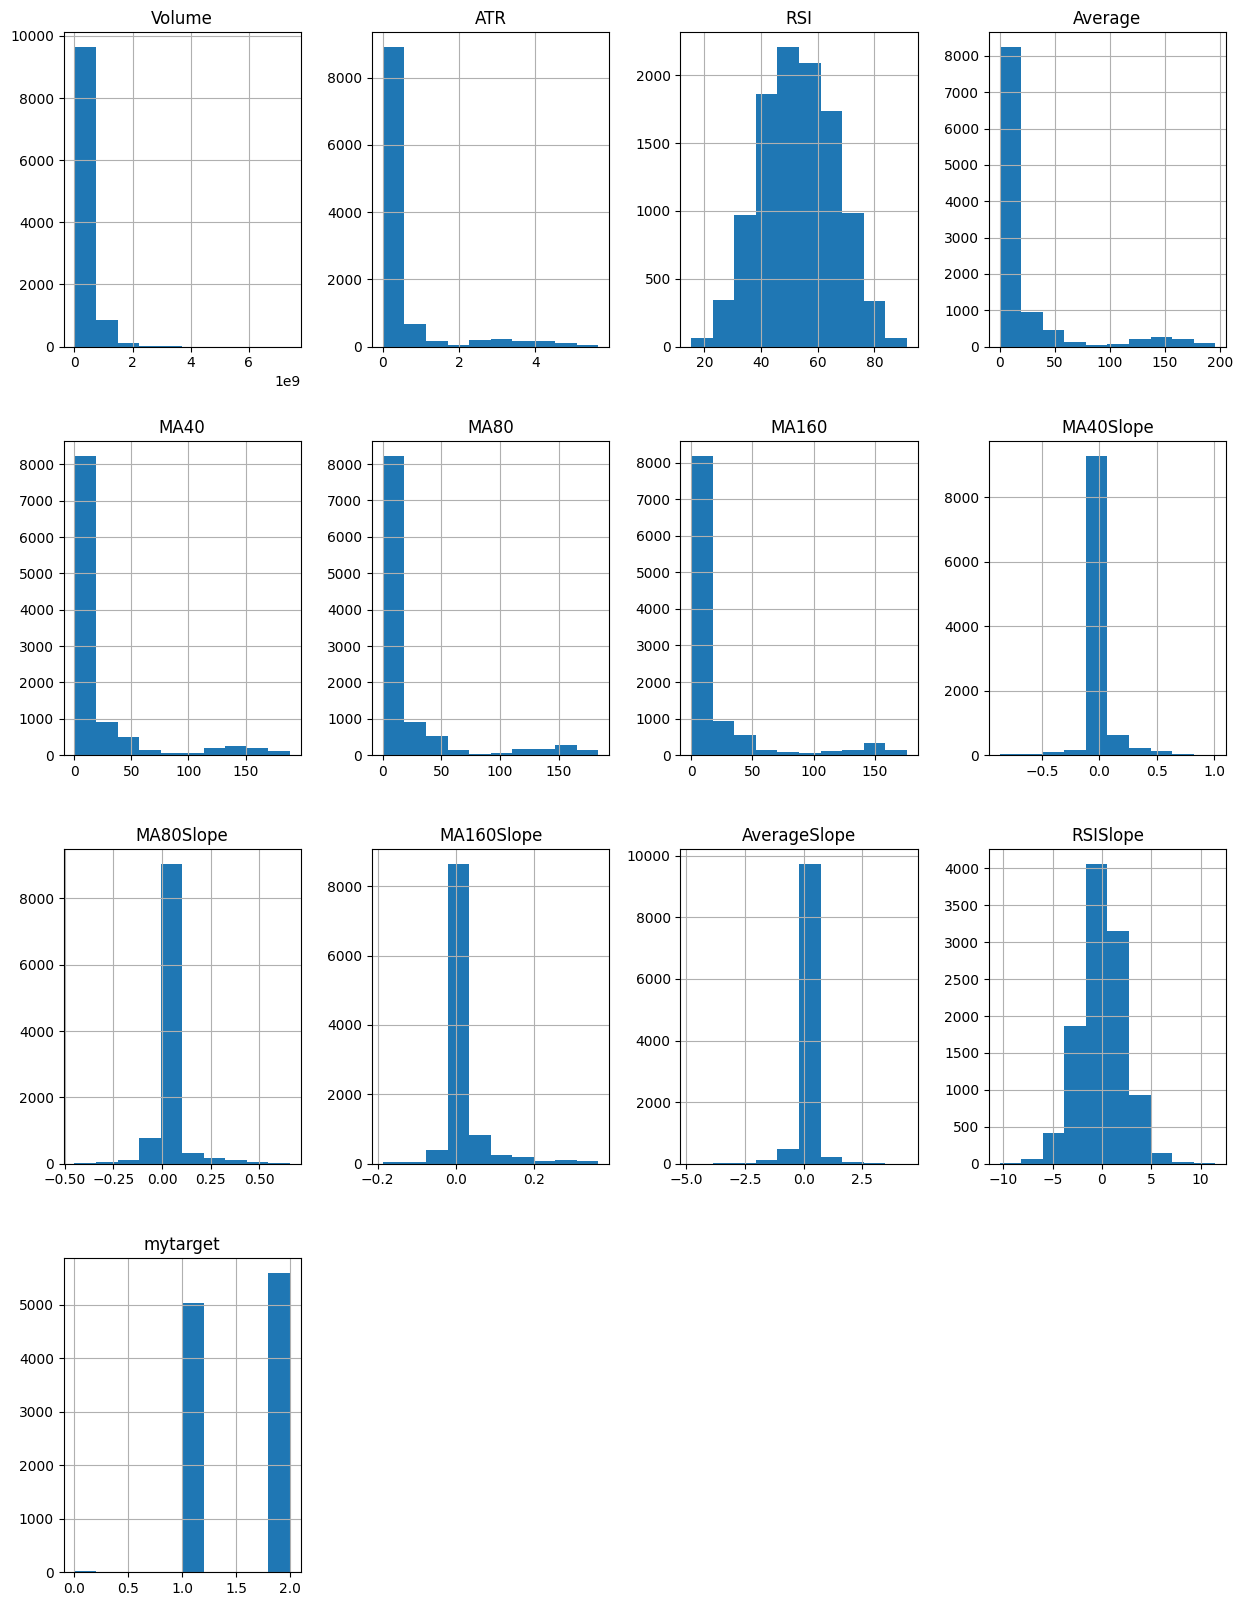

In [42]:
df = stock_dict["AAPL"]

# Quick Analysis Example
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
df_model= df[['Volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'MA40Slope', 'MA80Slope', 'MA160Slope', 'AverageSlope', 'RSISlope', 'mytarget']] 
df_model.hist(ax = ax)
plt.show()

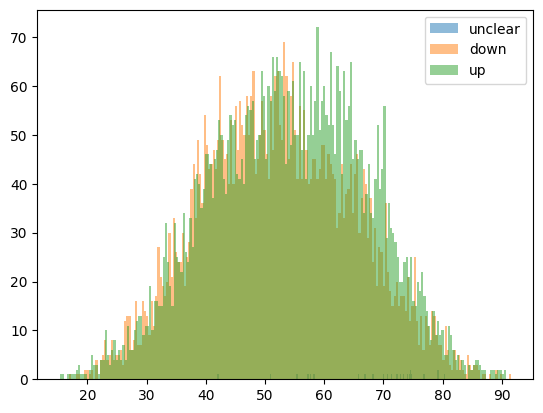

In [44]:
df = stock_dict["AAPL"]

from matplotlib import pyplot

df_up=df.RSI[ df['mytarget'] == 2 ]
df_down=df.RSI[ df['mytarget'] == 1 ]
df_unclear=df.RSI[ df['mytarget'] == 0 ]
pyplot.hist(df_unclear, bins=200, alpha=0.5, label='unclear')
pyplot.hist(df_down, bins=200, alpha=0.5, label='down')
pyplot.hist(df_up, bins=200, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
# # security = stock_dict['AAPL']
# security[['Volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'MA40Slope', 'MA80Slope', 'MA160Slope', 'AverageSlope', 'RSISlope']]

In [45]:
# Delete stocks we cant use
for stock in stock_dict.keys():
    security = stock_dict[stock]
    attributes=['Volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'MA40Slope', 'MA80Slope', 'MA160Slope', 'AverageSlope', 'RSISlope']


In [46]:
# Splitting features
to_delete = []
for stock in stock_dict.keys():
    security = stock_dict[stock]
    
    attributes=['Volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'MA40Slope', 'MA80Slope', 'MA160Slope', 'AverageSlope', 'RSISlope']
    try:
        X = security[attributes]
        y = security["mytarget"]
        
    except KeyError:
        to_delete.append(stock)


In [47]:
# Delete stocks we cant use
for stock in to_delete:
    del stock_dict[stock]

In [49]:
# pip install -U scikit-learn

In [50]:
# Split test and check data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [51]:
# Fitting Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=200, weights='uniform', algorithm='kd_tree', leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=1)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [52]:
# Model Evaliation
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

Accuracy train: 54.56%
Accuracy test: 52.07%


In [53]:
#------------------------------------------------------------------
#--- How should I compare my accuracy ?
print(df_model['mytarget'].value_counts()*100/df_model['mytarget'].count())

mytarget
2.0    52.525822
1.0    47.220657
0.0     0.253521
Name: count, dtype: float64


In [54]:
# Random Model, gambler?
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

Accuracy Gambler: 33.61%


In [56]:
# pip install xgboost

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [58]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 98.9468%
****Test Results****
Accuracy: 77.6417%


In [59]:
# Lets not make our data sampling random
#sequential sampling
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 98.7936%
****Test Results****
Accuracy: 51.5314%


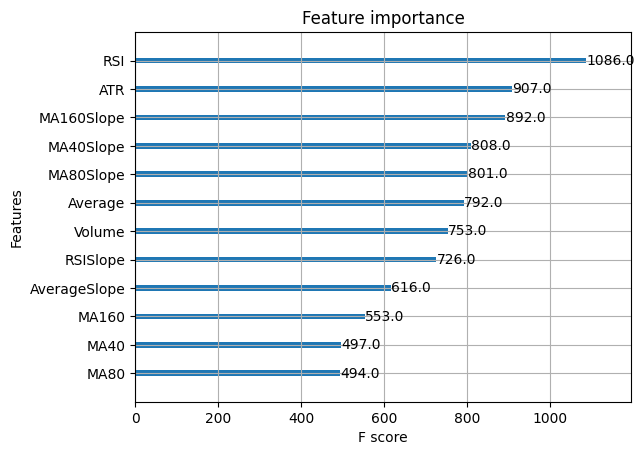

In [60]:
# What features are most important 
from matplotlib import pyplot
from xgboost import plot_importance
#plot feature importance
plot_importance(model)
pyplot.show()

In [61]:
import joblib

# save your ML model to disk
filename = 'StockPredictorModel_1.sav'
joblib.dump(model, filename)


['StockPredictorModel_1.sav']

In [62]:
import joblib

#load the model from disk
loaded_model = joblib.load('StockPredictorModel_1.sav')

In [63]:
#pip install webull

In [64]:
# account.get_current_orders()
print(account.is_logged_in())

True


In [ ]:
# account.place_order(stock="SPY", action='BUY', orderType="MKT" , quant= 1, enforce="DAY")

In [ ]:
# account.place_order(stock="SPY", action='SELL', orderType="MKT" , quant= 1, enforce="DAY")

In [ ]:
# security = yf.Ticker("AAPL")
# data = security.history(period='1mo')

# for i in range(len(data)):


In [ ]:
import smtplib
gmail_user = 'raullopez0402@gmail.com'
gmail_password = 'Gypsy2002!'
sent_from = gmail_user
to = ['raullopez0402@gmail.com']
subject = 'info CHF'

In [ ]:
# for stock in stock_dict.keys():
#     stock, curr = stock.split('-')
#     stock = stock + curr
#     try:
#         df = account.get_bars_crypto(stock=f'{stock}', interval='m5', count=322, extendTrading=0, timeStamp=None)
#         print(stock)
#     except:
#         continue

In [87]:
temp = account.get_bars(stock=f'AAPL', interval='m5', count=322, extendTrading=0, timeStamp=None)
# len(temp)

In [96]:
# temp = account.get_account()['netLiquidation']

# temp['netLiquidation']

temp = account.get_account()['netLiquidation']

int(float(temp))

1000000

In [101]:

def some_job():
    for stock in stock_dict.keys():
        modelPrediction = 0
        try:
            df = account.get_bars(stock=f'{stock}', interval='m5', count=322, extendTrading=0, timeStamp=None)
        except:
            continue
    
        high = list(df['high'])
        low = list(df["low"])
        close = list(df["close"])
        open = list(df["open"])
        volume = list(df["volume"])

        dfstream = pd.DataFrame(columns=['Volume','Open','Close','High','Low'])
        i = 0
        for i in range(len(df)):
            dfstream.loc[i, ['Volume']] = float(str(volume[i]))
            dfstream.loc[i, ['Open']] = float(str(open[i]))
            dfstream.loc[i, ['Close']] = float(str(close[i]))
            dfstream.loc[i, ['High']] = float(str(high[i]))
            dfstream.loc[i, ['Low']] = float(str(low[i]))
            i=i+1

        dfstream['Volume'] = dfstream['Volume'].astype(float)
        dfstream['Open'] = dfstream['Open'].astype(float)
        dfstream['Close'] = dfstream['Close'].astype(float)
        dfstream['High'] = dfstream['High'].astype(float)
        dfstream['Low'] = dfstream['Low'].astype(float)

        dfstream['ATR'] = dfstream.ta.atr(length=20)
        dfstream['RSI'] = dfstream.ta.rsi()
        dfstream['Average'] = dfstream.ta.midprice(length=1)
        dfstream['MA40'] = dfstream['Open'].rolling(window=40).mean()
        dfstream['MA80'] = dfstream['Open'].rolling(window=80).mean()
        dfstream['MA160'] = dfstream['Open'].rolling(window=160).mean()

        backrollingN = 5

        dfstream['MA40Slope'] = dfstream['MA40'].rolling(window = backrollingN).apply(get_slope, raw=True)
        dfstream['MA80Slope'] = dfstream['MA80'].rolling(window = backrollingN).apply(get_slope, raw=True)
        dfstream['MA160Slope'] = dfstream['MA160'].rolling(window = backrollingN).apply(get_slope, raw=True)
        dfstream['AverageSlope'] = dfstream['Average'].rolling(window = backrollingN).apply(get_slope, raw=True)
        dfstream['RSISlope'] = dfstream['RSI'].rolling(window = backrollingN).apply(get_slope, raw=True)

        X_stream = dfstream.iloc[[-1]]

        attributes=['Volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'MA40Slope', 'MA80Slope', 'MA160Slope', 'AverageSlope', 'RSISlope']
        X_model = X_stream[attributes]
        
        # Apply the model for predictions
        ModelPrediction = loaded_model.predict(X_model)
        
        TPbuy = float(open[i - 1]) * 1.03
        SLbuy = float(open[i - 1]) * 0.99
        TPSell = float(open[i - 1]) * 0.97
        SLSell = float(open[i - 1]) * 1.01
        quant = int(float(account.get_account()['netLiquidation'])) * .01
        
        #Sell
        if ModelPrediction == 1:
            print("Sell")
            # Place Order
            account.place_order(stock=security, tId=None, action='SELL', orderType='MKT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
            # Set Stop Loss
            account.place_order(stock=security, tId=None, price=SLSell, action='BUY', orderType='LMT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
            # Set Take Profit
            account.place_order(stock=security, tId=None, price=TPSell, action='BUY', orderType='LMT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)

        #Buy
        elif ModelPrediction == 2:
            print("Buy")
            # Place Order
            account.place_order(stock=security, tId=None, action='BUY', orderType='MKT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
            # Set Stop Loss
            account.place_order(stock=security, tId=None, price=SLBuy, action='SELL', orderType='LMT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
            # Set Take Profit
            account.place_order(stock=security, tId=None, price=TPBuy, action='SELL', orderType='LMT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)


In [102]:
# pip install apscheduler

In [103]:
# scheduler.running()

In [104]:
from apscheduler.schedulers.blocking import BlockingScheduler
# job_defaults={'max_instances': 2}
scheduler = BlockingScheduler(job_defaults={
    'misfire_grace_time': 15*60,
    'max_instances': 100
})
# scheduler = BlockingScheduler()
# scheduler.add_job(some_job, 'cron', day_of_week='mon-fri', minute=1, jitter=120, timezone='America/New_York')
scheduler.add_job(some_job, 'interval', seconds=30)
scheduler.start()

Job "some_job (trigger: interval[0:00:30], next run at: 2024-01-05 11:08:46 PST)" raised an exception
Traceback (most recent call last):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/apscheduler/executors/base.py", line 125, in run_job
    retval = job.func(*job.args, **job.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/nc/yrscg8z12gg8byvf1x104k980000gn/T/ipykernel_99943/1839156157.py", line 64, in some_job
    account.place_order(stock=security, tId=None, action='SELL', orderType='MKT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 1463, in place_order
    tId = self.get_ticker(stock)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 410, in get_ticker
    if stock and isinstance(stock, str):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/pandas/co

Sell


Job "some_job (trigger: interval[0:00:30], next run at: 2024-01-05 11:09:16 PST)" raised an exception
Traceback (most recent call last):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/apscheduler/executors/base.py", line 125, in run_job
    retval = job.func(*job.args, **job.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/nc/yrscg8z12gg8byvf1x104k980000gn/T/ipykernel_99943/1839156157.py", line 64, in some_job
    account.place_order(stock=security, tId=None, action='SELL', orderType='MKT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 1463, in place_order
    tId = self.get_ticker(stock)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 410, in get_ticker
    if stock and isinstance(stock, str):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/pandas/co

Sell


Job "some_job (trigger: interval[0:00:30], next run at: 2024-01-05 11:09:46 PST)" raised an exception
Traceback (most recent call last):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/apscheduler/executors/base.py", line 125, in run_job
    retval = job.func(*job.args, **job.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/nc/yrscg8z12gg8byvf1x104k980000gn/T/ipykernel_99943/1839156157.py", line 64, in some_job
    account.place_order(stock=security, tId=None, action='SELL', orderType='MKT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 1463, in place_order
    tId = self.get_ticker(stock)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 410, in get_ticker
    if stock and isinstance(stock, str):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/pandas/co

Sell


Job "some_job (trigger: interval[0:00:30], next run at: 2024-01-05 11:10:16 PST)" raised an exception
Traceback (most recent call last):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/apscheduler/executors/base.py", line 125, in run_job
    retval = job.func(*job.args, **job.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/nc/yrscg8z12gg8byvf1x104k980000gn/T/ipykernel_99943/1839156157.py", line 64, in some_job
    account.place_order(stock=security, tId=None, action='SELL', orderType='MKT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 1463, in place_order
    tId = self.get_ticker(stock)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 410, in get_ticker
    if stock and isinstance(stock, str):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/pandas/co

Sell


Job "some_job (trigger: interval[0:00:30], next run at: 2024-01-05 11:10:46 PST)" raised an exception
Traceback (most recent call last):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/apscheduler/executors/base.py", line 125, in run_job
    retval = job.func(*job.args, **job.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/nc/yrscg8z12gg8byvf1x104k980000gn/T/ipykernel_99943/1839156157.py", line 64, in some_job
    account.place_order(stock=security, tId=None, action='SELL', orderType='MKT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 1463, in place_order
    tId = self.get_ticker(stock)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 410, in get_ticker
    if stock and isinstance(stock, str):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/pandas/co

Sell


Job "some_job (trigger: interval[0:00:30], next run at: 2024-01-05 11:11:16 PST)" raised an exception
Traceback (most recent call last):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/apscheduler/executors/base.py", line 125, in run_job
    retval = job.func(*job.args, **job.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/nc/yrscg8z12gg8byvf1x104k980000gn/T/ipykernel_99943/1839156157.py", line 64, in some_job
    account.place_order(stock=security, tId=None, action='SELL', orderType='MKT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 1463, in place_order
    tId = self.get_ticker(stock)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 410, in get_ticker
    if stock and isinstance(stock, str):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/pandas/co

Sell


Job "some_job (trigger: interval[0:00:30], next run at: 2024-01-05 11:11:46 PST)" raised an exception
Traceback (most recent call last):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/apscheduler/executors/base.py", line 125, in run_job
    retval = job.func(*job.args, **job.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/nc/yrscg8z12gg8byvf1x104k980000gn/T/ipykernel_99943/1839156157.py", line 64, in some_job
    account.place_order(stock=security, tId=None, action='SELL', orderType='MKT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 1463, in place_order
    tId = self.get_ticker(stock)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 410, in get_ticker
    if stock and isinstance(stock, str):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/pandas/co

Sell


Job "some_job (trigger: interval[0:00:30], next run at: 2024-01-05 11:12:16 PST)" raised an exception
Traceback (most recent call last):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/apscheduler/executors/base.py", line 125, in run_job
    retval = job.func(*job.args, **job.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/nc/yrscg8z12gg8byvf1x104k980000gn/T/ipykernel_99943/1839156157.py", line 64, in some_job
    account.place_order(stock=security, tId=None, action='SELL', orderType='MKT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 1463, in place_order
    tId = self.get_ticker(stock)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 410, in get_ticker
    if stock and isinstance(stock, str):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/pandas/co

Sell


Job "some_job (trigger: interval[0:00:30], next run at: 2024-01-05 11:12:46 PST)" raised an exception
Traceback (most recent call last):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/apscheduler/executors/base.py", line 125, in run_job
    retval = job.func(*job.args, **job.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/nc/yrscg8z12gg8byvf1x104k980000gn/T/ipykernel_99943/1839156157.py", line 64, in some_job
    account.place_order(stock=security, tId=None, action='SELL', orderType='MKT', enforce='DAY', quant=quant, outsideRegularTradingHour=True)
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 1463, in place_order
    tId = self.get_ticker(stock)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/webull/webull.py", line 410, in get_ticker
    if stock and isinstance(stock, str):
  File "/Users/raullopez/miniconda3/lib/python3.11/site-packages/pandas/co

Sell


KeyboardInterrupt: 